### K-Means Procedure

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [19]:
values_3d = np.random.rand(40,3)

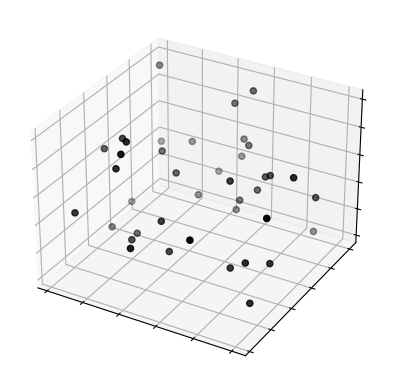

In [30]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

ax.scatter(values_3d[:,0],values_3d[:,1],values_3d[:,2], c='k')
plt.savefig('Plots/Cluster Centroids 3D', dpi=600)
plt.show()

In [23]:
values_2d = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(values_3d)

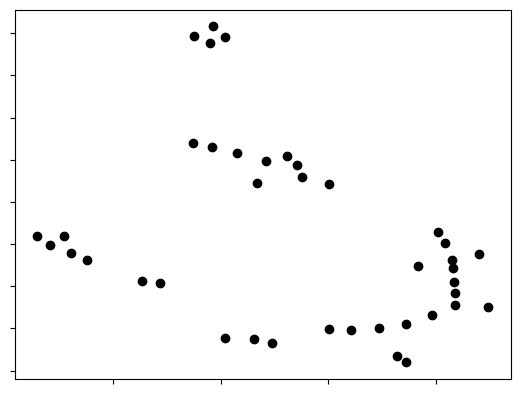

In [32]:
fig, ax = plt.subplots()

ax.set_xticklabels([])
ax.set_yticklabels([])
# ax.set_zticklabels([])

ax.scatter(values_2d[:,0],values_2d[:,1], c='k')
plt.savefig('Plots/Cluster Centroids 2D', dpi=600)
plt.show()

### K-Means representative clusters 

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('neural_network_data/train_labels_pp_balanced.csv')
data

image_name  label         P     speed     x_dir     y_dir  \
0        layer237_4975.png      0  1.468617  0.600853 -1.226888  0.684404   
1        layer111_2660.png      0  0.412525  0.601111 -1.402342 -0.001543   
2        layer147_5783.png      0  0.412525 -0.833121 -1.237284  0.665077   
3        layer122_2499.png      0  0.412525  0.604019 -0.381075 -1.366360   
4        layer237_2187.png      0  1.470894  0.604236  1.252436 -0.667908   
...                    ...    ...       ...       ...       ...       ...   
1868755   layer95_2930.png     23  1.469730  0.602446  0.603352  1.285236   
1868756     layer9_856.png     23 -0.641700  0.606370  0.007509 -1.421354   
1868757   layer77_2681.png     23  0.414998  0.605989 -0.381051 -1.366367   
1868758     layer3_366.png     23  0.412525 -0.600130  1.004423 -1.005501   
1868759   layer77_2202.png     23 -0.446524 -0.926845  1.240583  0.686811   

            accel        ed  heating  turning  res_heat  
0        0.023735 -0.084274        0        0 -0.597006  
1        0.020722 -0.366436        0        0 -0.463346  
2        0.022852  0.479899        0        0 -0.662812  
3        0.023735 -0.367508        0        0 -0.618737  
4        0.018591 -0.085162        0        0 -0.193755  
...           ...       ...      ...      ...       ...  
1868755  0.022852 -0.084681        0        0 -0.477584  
1868756  0.020722 -0.649536        0        0 -0.084610  
1868757  0.018591 -0.367573        1        0 -0.640215  
1868758 -1.136221  0.279462        0        0 -0.395216  
1868759  0.972372  0.189952        1        0 -0.474816  

[1868760 rows x 11 columns]

In [3]:
labels = np.array(data['label'])
labels

array([ 0,  0,  0, ..., 23, 23, 23], dtype=int64)

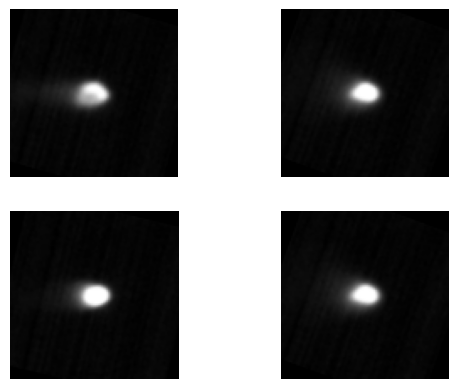

In [61]:
MELT_POOL_CLASS = 23

indx = np.where(labels == MELT_POOL_CLASS)[0]
image_names = np.array(data['image_name'])[indx]
total_images = len(image_names)
selected_img_indx = np.random.randint(0,total_images,4)
selected_img_name = image_names[selected_img_indx]

fig, ax = plt.subplots(2,2)

x = 0
y = 0
for name in selected_img_name:
    layer_num = name[:name.find('_')]
#     full_img_name = '../../Melt Pool Camera Preprocessed PNG/' + layer_num + '/' + name
    full_img_name = '../../../In-situ Meas Data/In-Situ Meas Data/Melt Pool Camera Preprocessed PNG/' + layer_num + '/' + name
    image = cv2.imread(full_img_name)
    ax[x, y].imshow(image)
    ax[x, y].axis('off')
    if x == 1:
        x = 0
        y += 1
    else:
        x = 1

plt.savefig('Plots/Clusters/Final/Class' + str(MELT_POOL_CLASS) + '.png', dpi=600)